In [1]:
import json
import os
import sys
import csv

import boto3

module_path = ".."
sys.path.append(os.path.abspath(module_path))

bedrock_runtime = boto3.client(
    service_name='bedrock-runtime', 
    aws_access_key_id=os.getenv('aws_access_key_id'),
    aws_secret_access_key=os.getenv('aws_secret_access_key'),
    region_name='us-west-2'
)

In [2]:
weather_data = [
    ["date", "location_code", "max_temp", "min_temp"],
    ["2023-01-01", "LOC001", 68, 45],
    ["2023-01-02", "LOC002", 70, 47],
    ["2023-01-03", "LOC001", 65, 44],
    ["2023-01-04", "LOC003", 72, 50],
    ["2023-01-05", "LOC001", 68, 46],
    ["2023-01-06", "LOC002", 71, 48],
    ["2023-01-07", "LOC003", 73, 51],
    ["2023-01-08", "LOC001", 66, 43],
    ["2023-01-09", "LOC002", 70, 47],
    ["2023-01-10", "LOC003", 74, 52],
    ["2023-01-11", "LOC001", 67, 44],
    ["2023-01-12", "LOC002", 69, 46],
    ["2023-01-13", "LOC001", 64, 42],
    ["2023-01-14", "LOC003", 71, 49],
    ["2023-01-15", "LOC001", 66, 43],
    ["2023-01-16", "LOC002", 68, 45],
    ["2023-01-17", "LOC003", 72, 50],
    ["2023-01-18", "LOC001", 65, 44],
    ["2023-01-19", "LOC002", 67, 46],
    ["2023-01-20", "LOC003", 70, 48],
    ["2023-01-21", "LOC001", 63, 41],
    ["2023-01-22", "LOC002", 66, 44],
    ["2023-01-23", "LOC003", 69, 47],
    ["2023-01-24", "LOC001", 62, 40],
    ["2023-01-25", "LOC002", 65, 43],
    ["2023-01-26", "LOC003", 68, 46],
    ["2023-01-27", "LOC001", 61, 39],
    ["2023-01-28", "LOC002", 64, 42],
    ["2023-01-29", "LOC003", 67, 45],
    ["2023-01-30", "LOC001", 60, 38],
    ["2023-01-31", "LOC002", 63, 41],
    ["2023-02-01", "LOC003", 66, 44],
    ["2023-05-24", "LOC001", 75, 53],
    ["2023-05-25", "LOC002", 78, 56]
]

# Record data to daily_temps.csv
with open('daily_temps.csv', 'w', newline='') as csv_file:
    weather_writer = csv.writer(csv_file)
    weather_writer.writerows(weather_data)

print("daily_temps.csv has been recorded!")

daily_temps.csv has been recorded!


In [3]:
scenario_description = """

Human: Provided is a CSV file, daily_temps.csv, with the columns:
- date (YYYY-MM-DD)
- location_code
- max_temp
- min_temp

Craft a python script to examine the weather data from the CSV file. The script should be able to read the data, and determine the following:

- The average max temperature for the year
- The location with the highest max temperature
- The date with the largest temperature range
- Visualize monthly average max temperatures using a bar chart

Ensure the code is syntactically correct, error-free, optimized, does not span multiple lines unnecessarily, and prefer to use standard libraries. Provide only the python code without any surrounding text, explanation, or context. Note that list indices must be integers or slices, not float and make sure there are no division by zero errors. Make sure the averaging is done properly.

Assistant:
"""

In [4]:
request_body = json.dumps({
                    "prompt": scenario_description,
                    "max_tokens_to_sample":4096,
                    "temperature":0.5,
                    "top_k":250,
                    "top_p":0.5,
                    "stop_sequences": ["\n\nHuman:"]
                  }) 

In [5]:
modelId = 'anthropic.claude-v2'
accept = 'application/json'
contentType = 'application/json'

model_response = bedrock_runtime.invoke_model(body=request_body, modelId=modelId, accept=accept, contentType=contentType)
response_contents = json.loads(model_response.get('body').read())

print(response_contents.get('completion'))

 Here is the Python code to analyze the weather data in daily_temps.csv:

```python
import csv
from datetime import datetime
import matplotlib.pyplot as plt

temps = []
with open('daily_temps.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        date = datetime.strptime(row[0], '%Y-%m-%d')
        month = date.month
        max_temp = float(row[2])
        min_temp = float(row[3])
        temps.append([month, max_temp])

max_temps = [row[1] for row in temps]
avg_max = sum(max_temps) / len(max_temps)

max_by_loc = {}
for row in temps:
    if row[0] not in max_by_loc:
        max_by_loc[row[0]] = row[1]
    else:
        max_by_loc[row[0]] = max(max_by_loc[row[0]], row[1])

max_loc = max(max_by_loc, key=max_by_loc.get)

max_range = max([row[1] - row[2] for row in temps])

month_avgs = {i:0 for i in range(1,13)}
for row in temps:
    month_avgs[row[0]] += row[1]
for i in month_avgs:
    month_avgs[i] /= len([row for row in temps if row[0]==i])

plt.ba

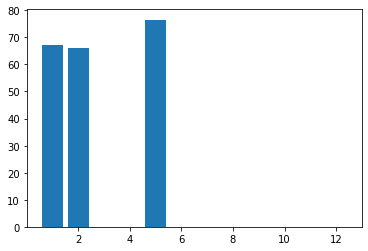

In [6]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

temps = []
with open('daily_temps.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        date = datetime.strptime(row[0], '%Y-%m-%d')
        location = row[1]
        max_temp = int(row[2])
        min_temp = int(row[3])
        temps.append([date, location, max_temp, min_temp])

max_temps = [row[2] for row in temps]
avg_max = sum(max_temps) / len(max_temps)

max_by_location = {}
for row in temps:
    if row[1] not in max_by_location:
        max_by_location[row[1]] = row[2]
    else:
        max_by_location[row[1]] = max(max_by_location[row[1]], row[2])
max_loc = max(max_by_location, key=max_by_location.get)

max_range = max([row[2] - row[3] for row in temps])
max_range_day = [row for row in temps if row[2] - row[3] == max_range][0][0]

monthly_avgs = {i:[] for i in range(1,13)}
for row in temps:
    month = row[0].month
    monthly_avgs[month].append(row[2])

plt.bar(range(1,13), [sum(m)/len(m) if len(m) > 0 else 0 for m in monthly_avgs.values()])
plt.show()